# Regressão
**Autor:** [Anderson França](https://www.linkedin.com/in/anderson-m-franca/)
| **Contato:** [github.com/andfranca](https://github.com/andfranca/estatistica-e-aprendizado-de-maquinas-ptbr)

<br>
<a href="https://creativecommons.org/licenses/by/3.0/">
  <img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png"  />
</a>


Utilizamos técnicas de regressão para determinar a relação entre duas ou mais variáveis. Tanto em Machine Learning quanto em modelagem estatística, essas técnicas ajudam a prever valores contínuos, modelando a relação entre variáveis dependentes (alvo) e independentes de um conjunto de dados. A regressão é aplicada quando a variável dependente e as variáveis independentes estão relacionadas de forma linear ou não linear.


Existem diferentes tipos de técnicas de regressão, e a escolha do método adequado depende de diversos fatores, como o tipo de variável alvo, a forma da relação entre as variáveis e o número de variáveis independentes. Abaixo, apresentamos alguns exemplos e suas aplicações:


- **Regressão Linear:** Modelo mais simples e amplamente utilizado, ideal para relações lineares.
- **Regressão Logística:** Utilizada para prever variáveis categóricas e responder a perguntas de classificação.
- **Regressão Polinomial:** Captura relações não lineares, usando uma curva para ajustar os dados.
- **Support Vector Regression (SVR):** Busca encontrar um hiperplano que minimize o erro de previsão, sendo robusta a outliers.
- **Decision Tree Regression:** Utiliza árvores de decisão para segmentar os dados em regiões e prever valores com base em regras de decisão.
- **Random Forest Regression:** Conjunto de várias árvores de decisão para melhorar a robustez e precisão do modelo.
- **Ridge Regression:** Regressão linear com regularização L2 para evitar overfitting.
- **Lasso Regression:** Similar à Ridge, mas usa regularização L1, eliminando variáveis irrelevantes e ajudando na seleção de features.



### Problema

Vamos carregar o banco de dados [previsao energia solar.csv](https://raw.githubusercontent.com/andfranca/consumo-energia/main/Base%20de%20Dados/Previs%C3%A3o%20Energia%20Solar/previsao_energia_solar.csv), nesse problema vamos construir um modelo que possa prever de forma confiável a produção de energia solar de uma célula fotovoltaica isolada, dadas várias condições atmosféricas e parâmetros meteorológicos.

O conjunto de dados contém a produção de energia de painéis fotovoltaicos horizontais localizados em 12 locais do hemisfério norte ao longo de 14 meses.

As variáveis independentes em cada coluna incluem: localização, data, hora da amostra, latitude, longitude, altitude, ano e mês, mês, hora, estação, umidade, temperatura ambiente, produção de energia do painel solar, velocidade do vento, visibilidade, pressão e teto das nuvens.

In [ ]:
#importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
#Carregar banco de dados
energia = pd.read_csv('https://raw.githubusercontent.com/andfranca/consumo-energia/main/Base%20de%20Dados/Previs%C3%A3o%20Energia%20Solar/previsao_energia_solar.csv', decimal = ',')

### Regressão Linear

Uma das técnicas de modelagem mais utilizadas é a regressão linear, que assume uma conexão linear entre uma variável dependente (Y) e uma ou mais variáveis independentes (X). Ela busca encontrar a linha de melhor ajuste que minimiza a soma das diferenças entre os valores observados e os valores preditos pelo modelo.

A relação linear é definida como:

$Y = \beta_0 + \beta_1 x_1 + ε$

onde:

- $Y$ = é a variável dependente que queremos estimar (ex.: produção de energia solar). <br>
- $x$ = variáveis independentes (ex.: temperatura, umidade, pressão). <br>
- $ε$ = termo de erro aleatório associado a cada observação, representando a variação não explicada pelo modelo.<br>
- $\beta$ = coeficiente de inclinação, que mostra a variação em $Y$ para cada unidade de variação em $x$<br>


A linha de melhor ajuste é determinada pela minimização do erro ($\epsilon$), que é a diferença entre os valores observados e os valores preditos. Os valores de $\beta_0$ e $\beta_1$ são calculados de forma a minimizar a soma dos quadrados dos resíduos (erro), garantindo o menor erro possível do preditor.

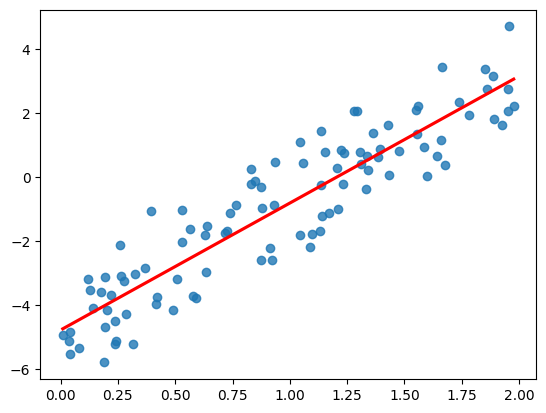

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

aleatorio = np.random.RandomState(0)
x = 2 * aleatorio.rand(100)
y = 4 * x - 5 + aleatorio.randn(100)

sns.regplot(x=x, y=y, ci=None, line_kws={"color": "red"})
plt.show()

A regressão linear é baseada em algumas suposições importantes para garantir a validade do modelo:

- **Relação Linear:** Deve existir uma relação linear entre as variáveis independentes e a variável dependente, garantindo que o impacto das preditoras seja proporcional e aditivo.

- **Ausência de Outliers:** Outliers podem distorcer os resultados e devem ser identificados e tratados para manter a robustez do modelo.

- **Homoscedasticidade:** A variância dos erros deve ser constante ao longo de todas as observações. Padrões de variância irregular (heterocedasticidade) podem afetar a precisão do modelo.

- **Independência das Observações:** As observações devem ser independentes entre si, sem que uma afete a outra, especialmente em dados temporais.

- **Erros com Distribuição Normal:** Os termos de erro devem ser normalmente distribuídos com média zero, assegurando intervalos de confiança e testes de hipóteses válidos.

- **Ausência de Multicolinearidade:** As variáveis independentes não devem estar altamente correlacionadas entre si. Multicolinearidade dificulta a estimativa precisa dos coeficientes.

- **Sem Autocorrelação:** Os resíduos não devem mostrar correlação entre si, o que é especialmente importante em séries temporais


## Correlação

Para verificar a relação linear entre as variáveis, é possível utilizar a função corr() para calcular todas as relações entre as variáveis utilizando a [correlação linear de person](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

A correlação pode ser positiva ou negativa, e quanto mais próximo de 1, mais forte é a correlação, ou seja, mais uma variável tem impacto na outra. Quanto mais próximo de 0, menor o impacto entre essas variáveis.

<img src="https://drive.google.com/uc?id=1ea_NzygpJua7ijylkZzLnUdFJQKw59Iu" width="500" align="center"/>


#### Correlação não implica causalidade
Uma correlação espúria é uma relação aparente entre duas variáveis que na verdade não existe ou é causada por um terceiro fator (variável de confusão). Embora as duas variáveis possam parecer estar relacionadas, essa correlação não reflete uma relação causal real entre elas.

Para visualizar a matriz de correlação no python, usamos a função `corr()`


In [ ]:
#Matriz de Correlação
energia.corr()

,Localizacao,Data,Mes,Hora,Estacao,Umidade,Temperatura,Geracao,Vento,Visibilidade,Pressao,Cloud.Ceiling
Localizacao,1.000000,-0.082847,0.003180,0.015610,0.050539,-0.193998,0.042110,-0.023522,0.120780,0.042809,-0.365790,0.147018
Data,-0.082847,1.000000,-0.590628,0.009139,-0.319798,0.113511,-0.086950,0.019585,0.033170,-0.027652,0.064530,-0.041170
Mes,0.003180,-0.590628,1.000000,-0.010423,0.622892,-0.127632,0.213217,-0.024981,-0.084922,0.063204,-0.019603,0.091687
Hora,0.015610,0.009139,-0.010423,1.000000,-0.026922,-0.209345,0.169163,0.094935,0.137463,0.026201,-0.044172,-0.004694
Estacao,0.050539,-0.319798,0.622892,-0.026922,1.000000,-0.117497,0.386695,0.136054,-0.046895,0.093381,-0.075237,0.069521
Umidade,-0.193998,0.113511,-0.127632,-0.209345,-0.117497,1.000000,-0.571742,-0.397819,0.059444,-0.274019,0.430945,-0.475787
Temperatura,0.042110,-0.086950,0.213217,0.169163,0.386695,-0.571742,1.000000,0.580395,-0.098761,0.233031,-0.097168,0.331845
Geracao,-0.023522,0.019585,-0.024981,0.094935,0.136054,-0.397819,0.580395,1.000000,0.071087,0.204905,0.073867,0.416574
Vento,0.120780,0.033170,-0.084922,0.137463,-0.046895,0.059444,-0.098761,0.071087,1.000000,0.044155,0.000279,0.023425
Visibilidade,0.042809,-0.027652,0.063204,0.026201,0.093381,-0.274019,0.233031,0.204905,0.044155,1.000000,-0.026324,0.240096


A correlação de Pearson só captura relações lineares, então, mesmo que a correlação seja próxima de 0, pode haver outro tipo de relação entre as variáveis.
  
<p style="text-align: center;">
  <img width=800 src="https://github.com/andfranca/proadi-sus-ciencia-de-dados-ia/blob/main/imgs/regressao-2.png?raw=true" />
</p>




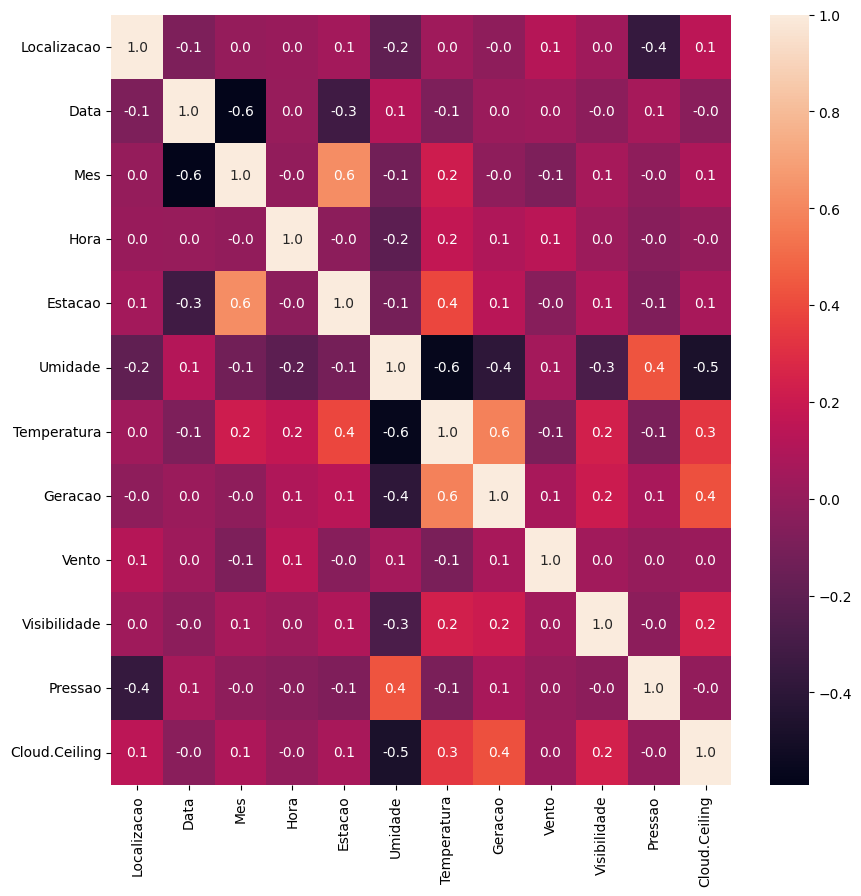

In [ ]:
#Ajustar um tamanho para o gráfico (1000x1000)
plt.figure(figsize=(10, 10))

#Matriz de correlação
dataplot = sns.heatmap(energia.corr(),
                       annot=True,
                       fmt='.1f') #annot são anotações e fmt a formatação dos valores

<Figure size 500x500 with 0 Axes>

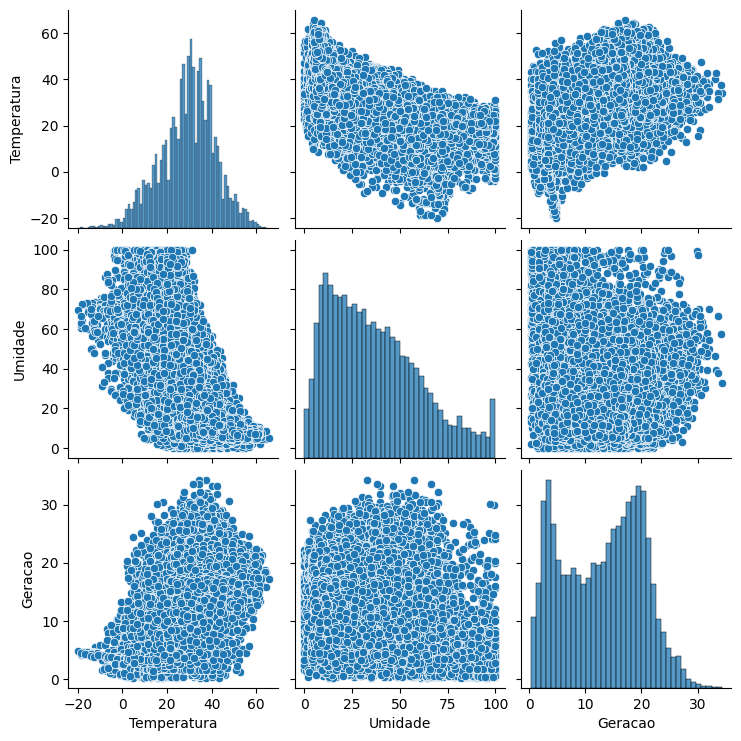

In [ ]:
plt.figure(figsize=(5, 5))

#Gráficos
sns.pairplot(energia[['Temperatura', 'Umidade', 'Geracao']])
plt.show()

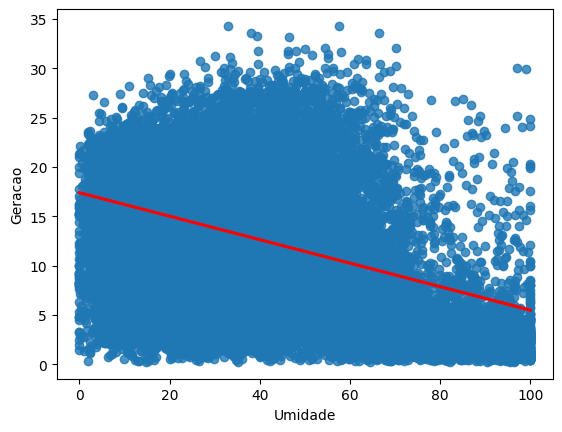

In [ ]:
#Regressão entre umidade e a geracao
sns.regplot(data=energia,
            x='Umidade',
            y='Geracao',
            line_kws={"color": "red"})
plt.show()

## Regressão Linear Simples
Agora que identificamos indícios de que há correlação entre nossas variáveis, vamos definir as hióteses a serem testadas.

- **Hipótese Nula (H₀)**: Os coeficientes das variáveis independentes no modelo de regressão linear são iguais a zero, ou seja, não há relação linear significativa entre as variáveis e a produção de energia solar.

- **Hipótese Alternativa (H₁)**: Os coeficientes das variáveis independentes no modelo de regressão linear são diferentes de zero, ou seja, há uma relação linear significativa entre as variáveis e a produção de energia solar.

### Regressão Linear Simples utilizando o statsmodels

O [Statsmodels](https://www.statsmodels.org/stable/index.html) é uma biblioteca poderosa para a estimativa de modelos estatísticos, realização de testes estatísticos, análise exploratória de dados e análise econométrica. O grande diferencial é a riqueza de informações detalhadas que fornece, incluindo coeficientes estimados, erros padrão, intervalos de confiança e uma variedade de estatísticas de teste.

Isso permite uma análise aprofundada e uma compreensão completa do desempenho dos modelos, e acaba sendo uma ferramenta essencial para cientistas de dados e analistas que buscam resultados precisos e bem documentados.

In [ ]:
#Carregar biblioteca
import statsmodels.api as sm

In [ ]:
#Definir as variáveis que serão utilizadas no modelo
y = pd.DataFrame(energia['Geracao'])
x = pd.DataFrame(energia['Temperatura'])

No Statsmodels, a constante não é adicionada automaticamente aos modelos, dando ao usuário mais controle sobre a inclusão ou não da constante. Isso é importante para análises estatísticas mais customizadas, onde a presença da constante pode não ser necessária. Para garantir que a constante esteja presente, o usuário precisa adicioná-la manualmente com o `sm.add_constant()`

In [ ]:
#adicionar a constante manualmente
x_const = sm.add_constant(x)

#ajustar o modelo
regressao_simples = sm.OLS(y,x_const).fit()
print(regressao_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                Geracao   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:08:48   Log-Likelihood:                -66858.
No. Observations:               21045   AIC:                         1.337e+05
Df Residuals:                   21043   BIC:                         1.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1884      0.103     31.019      

*** Para a descrição completa de cada campo dessa tabela, consulte o material da aula

### Analisar os resíduos

A análise dos resíduos é essencial para confirmar que o modelo de regressão é adequado e para garantir a validez estatística das inferências. Ignorar essa etapa pode levar a modelos que parecem bons no conjunto de treino, mas que falham ao serem aplicados a novos dados ou em análises mais aprofundadas.

#### Histograma dos Resíduos
Podemos plotar um histograma dos resíduos para visualizar se eles seguem uma distribuição aproximadamente normal.

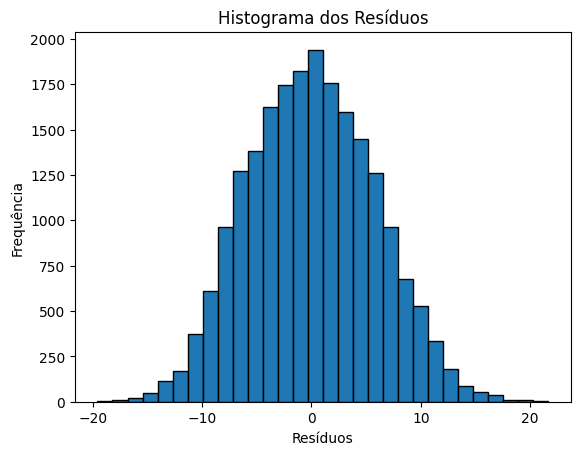

In [ ]:
import matplotlib.pyplot as plt

# Resíduos
residuos = regressao_simples.resid

# Plot do histograma
plt.hist(residuos, bins=30, edgecolor='black')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

#### Gráfico Q-Q Plot
 Um Q-Q plot é uma maneira visual de verificar a normalidade dos resíduos comparando-os com uma distribuição normal teórica.

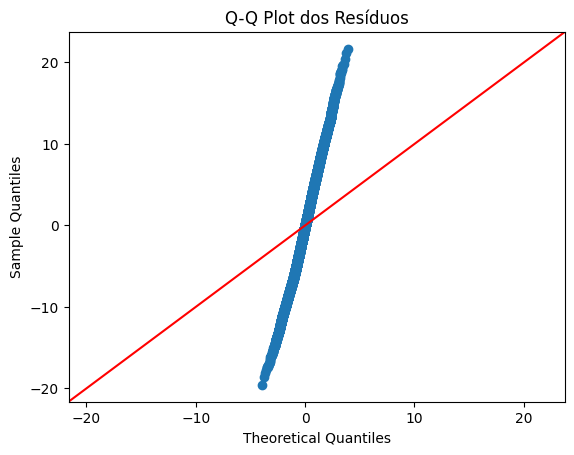

In [ ]:
import statsmodels.api as sm

# Q-Q plot dos resíduos
sm.qqplot(residuos, line='45')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

> *OBS: Esse Q-Q plot dos resíduos mostra uma grande desvio da linha de referência, indicando que os resíduos não seguem uma distribuição normal. Em um Q-Q plot ideal, os pontos deveriam estar alinhados ao longo da linha vermelha (linha de normalidade).*

> *Como a normalidade dos resíduos é uma das suposições desse tipo modelo, a violação dessa suposição pode impactar a validade dos intervalos de confiança e dos testes de hipóteses. É possível considerar alguma transformação para tentar normalizar o resíduos, ou então considerar o uso de modelos de regressão robustos ou alguma outra técnica que não assume normalidade do modelo.*





#### Testes Estatísticos

Para uma verificação mais formal da normalidade, podemos usar testes estatísticos como o teste de Shapiro-Wilk, que é bastante usado para validar a suposição de normalidade em diversas análises estatísticas, incluindo a análise dos resíduos em modelos de regressão.

O teste compara a distribuição da sua amostra com uma distribuição normal teórica e fornece um p-valor.
- Hipóteses:
 - **Hipótese nula ($H_0$):** A amostra segue uma distribuição normal.
 - **Hipótese alternativa ($H_1$):** A amostra não segue uma distribuição normal.

In [ ]:
from scipy import stats

# Suponha que 'residuos' seja seu vetor de resíduos
shapiro_test = stats.shapiro(residuos)
print(f'Estatística de Shapiro-Wilk: {shapiro_test[0]:.4f}, p-valor: {shapiro_test[1]:.4f}')

Estatística de Shapiro-Wilk: 0.9978, p-valor: 0.0000


> Como o p-valor é menor que 0,05, rejeita-se a hipótese nula, indicando que a amostra provavelmente não é normal.

## Regressão Linear Múltipla
No mundo real, utilizar apenas uma variável para explicar todas as características de um problema pode ser insuficiente. Por isso, é possível adicionar mais variáveis ao modelo, resultando em uma regressão linear múltipla. A fórmula dessa regressão é:

$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$

onde:

- $Y$ = é a variável dependente a ser estimada <br>
- $x$ = são as variáveis independentes<br>
- $\epsilon$ = é o erro (resíduo) aleatório associado a i-ésima observação<br>
- $\beta$ = coeficientes de regressão que quantificam a influência de cada variável independente.<br>


A linha de melhor ajuste é determinada pelos valores dos coeficientes $\beta_0, \beta_1, \ldots, \beta_n$, calculados para minimizar o erro ($\epsilon$) entre os valores observados e os preditos. Essa minimização é feita de forma a reduzir ao máximo a soma dos quadrados dos erros, garantindo a melhor estimativa possível do modelo.

In [ ]:
#Definir as variáveis que serão utilizadas no modelo
y = pd.DataFrame(energia['Geracao'])
x = pd.DataFrame(energia[['Localizacao'
                          , 'Data'
                          , 'Mes'
                          , 'Hora'
                          , 'Estacao'
                          , 'Umidade'
                          , 'Temperatura'
                          , 'Vento'
                          , 'Visibilidade'
                          , 'Pressao'
                          , 'Cloud.Ceiling'
                          ]])

In [ ]:
#adicionar a constante manualmente
x_const = sm.add_constant(x)

#ajustar o modelo
regressao_mult = sm.OLS(y,x_const).fit()
print(regressao_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                Geracao   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:15:55   Log-Likelihood:                -64786.
No. Observations:               21045   AIC:                         1.296e+05
Df Residuals:                   21033   BIC:                         1.297e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1276.8782    200.358      6.373

## Regressão Linear - Machine Learning

A **regressão linear** em estatística e em **machine learning** diferem principalmente no objetivo:

- **Estatística:** Foca na **inferência e interpretação**. Busca entender como as variáveis independentes afetam a variável dependente, analisando coeficientes e testando suposições (como linearidade e normalidade dos erros).

- **Machine Learning:** Foca em **previsão e performance**. Prioriza a minimização do erro e a generalização do modelo para novos dados, utilizando técnicas como cross-validation e regularização, sem tanta ênfase na interpretação dos coeficientes.

In [ ]:
# Carregar Pandas para manipulação de dados
import pandas as pd

In [ ]:
# Definir variável resposta e variáveis explicativas
y = pd.DataFrame(energia['Geracao'])
X = pd.DataFrame(energia[['Localizacao'
                          , 'Data'
                          , 'Mes'
                          , 'Hora'
                          , 'Estacao'
                          , 'Umidade'
                          , 'Temperatura'
                          , 'Vento'
                          , 'Visibilidade'
                          , 'Pressao'
                          , 'Cloud.Ceiling'
                          ]])

#### Scikit-learn

O [scikit-learn](https://scikit-learn.org/stable/) é uma biblioteca de machine learning em Python que fornece ferramentas simples e eficientes para análise de dados e construção de modelos preditivos. Ela inclui uma ampla variedade de algoritmos para classificação, regressão, clustering, e redução de dimensionalidade, além de funcionalidades para pré-processamento de dados, seleção de modelos, e avaliação de performance.

> Observe que, a partir deste agora, a maioria dos códigos utiliza a biblioteca scikit-learn como base.

#### Treino e Teste

- **Treino (Conjunto de Treinamento):** Esse é o subconjunto dos dados que é usado para ajustar ou treinar o modelo. Durante essa etapa, o modelo “aprende” as relações entre as variáveis independentes (predictoras) e a variável dependente (alvo). Pense nisso como a fase de **calibração de um instrumento de pesquisa**, onde você ajusta os parâmetros com base em uma parte dos dados disponíveis.

- **Teste (Conjunto de Teste):** É um subconjunto separado que não é usado durante o treino, mas sim para **avaliar a performance** do modelo. Essa etapa serve para simular como o modelo se comportaria em dados novos e garantir que ele seja capaz de generalizar, ou seja, fazer boas previsões em situações desconhecidas. Isso é semelhante a validar um modelo de pesquisa com um **grupo de controle** ou em um conjunto de dados externo para garantir que os resultados sejam robustos e não apenas adaptados aos dados originais.

In [ ]:
# Carregar função train_test_split
from sklearn.model_selection import train_test_split

# Dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #0.2 corresponde a 20%
                                                    random_state=42)

# Note que agora temos X_train, X_test, y_train e y_test
# prontos para treinar e avaliar o modelo

In [ ]:
#Carregar função da regressão linear
from sklearn.linear_model import LinearRegression

# Treinar o modelo de regressão linear com a base de treino
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

In [ ]:
# Visualizar parâmetros do modelo
print(f'Coeficiente de determinação: {modelo.score(X_train,y_train)}')
print(f'Intercepto: {modelo.intercept_}')

coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': modelo.coef_.ravel()
})

coeficientes

Coeficiente de determinação: 0.4528853352477604
Intercepto: [1335.88955608]


,Variável,Coeficiente
0,Localizacao,-0.114957
1,Data,-0.000067
2,Mes,-0.491262
3,Hora,-0.104117
4,Estacao,0.365979
5,Umidade,-0.033255
6,Temperatura,0.286121
7,Vento,0.128371
8,Visibilidade,0.111028
9,Pressao,0.012959


> O `scikit-learn` não mostra os p-valores dos coeficientes por padrão. Isso ocorre porque o scikit-learn é focado em machine learning e otimização de modelos preditivos, onde a interpretação estatística detalhada, como os p-valores, não é o foco principal. Caso seu foco seja na explicação do modelo, é possível utilizar o `statsmodels` para obter as estatísticas.

# Avaliação dos Modelos

In [ ]:
#Carregar a biblioteca de métricas
from sklearn import metrics

### R2 score

O _R2 Score_ Representa a proporção da variância (de y) que foi explicada pelas variáveis independentes no modelo. Ele fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas provavelmente serão previstas pelo modelo, por meio da proporção da variância explicada.

Como essa variação depende do conjunto de dados, os $R^2$ podem não ser significativamente comparáveis em diferentes conjuntos de dados. O melhor _score_ possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

Se $\hat{y}_i$ for o valor previsto da $i$-ésima amostra e $y_i$ for o valor verdadeiro correspondente para o total de $n$ amostras, o $R^2$ estimado é definido como:

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Fonte: [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [ ]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.4646805223318039

### R2 score Ajustado
A desvantagem do R2 score é que, ao adicionar novos recursos nos dados, o score começa a aumentar ou permanece constante, mas nunca diminui porque assume que, ao adicionar mais dados, a variação dos dados aumenta.

Mas o problema é quando adicionamos um recurso irrelevante no conjunto de dados e, nesse momento, o R2 às vezes começa a aumentar, o que é incorreto. Uma forma de lidar com esse tipo de problema, é utilizar o R2 ajustado.

<center>${\displaystyle {\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p}}$

Onde:
- $n$, é o número de observações na base
- $p$, é o número de variáveis independentes
- $R^2$, é o coeficiente de determinação

In [ ]:
n=X_test.shape[0] #qtde observações
k=X_test.shape[1] #qtde de variáveis
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
adj_r2_score

0.46327749296455345

### Mean Absolute Error - MAE

O erro absoluto médio (MAE) é uma das métricas mais comuns usadas para calcular o erro de previsão do modelo. O erro de previsão de uma única linha de dados é:

$ErroPrevisao = ValorAtual - ValorPrevisto$

Precisamos calcular os erros de previsão para cada linha de dados, obter seu valor absoluto e, em seguida, encontrar a média de todos os erros de previsão absolutos.

O MAE é dado pela seguinte fórmula:


<center> $\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$</center>



O gráfico abaixo representa os resíduos – diferenças entre os valores previstos (linha de regressão) e os valores de saída. O MAE usa o valor absoluto dos resíduos, portanto, não pode indicar se o modelo está com desempenho inferior ou superior.

<div>
<img src="https://i.ibb.co/6m8j6Bz/MAEgraphical.png" width="300" align="left"/>

</div>

Fonte: [Métricas de regressão](https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/)

Por esse motivo, um MAE pequeno sugere que o modelo é ótimo em previsão. Da mesma forma, um grande MAE sugere que seu modelo pode ter problemas para generalizar bem.

Uma das grandes vantagens de se utilizar o MAE é que ele está na mesma unidade da variável de saída e é bem robusto quanto aos outliers.

In [ ]:
#Calculando o MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

4.128572910028985

### Mean squared error - MSE

O erro quadrático médio (MSE) calcula a diferença quadrática média entre os valores alvo e previsto. Esta métrica é utilizada para muitos problemas de regressão, onde os erros maiores têm contribuições quadradas correspondentemente maiores para o erro médio.

O MSE é dado pela seguinte fórmula:

<center>$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$</center>

<div>
<img src="https://i.ibb.co/QpbsgNw/MSEgraphical.png" width="300" align="left"/>

</div>


O MSE quase sempre será maior que o MAE porque no MAE os resíduos contribuem linearmente para o erro total, enquanto no MSE o erro cresce quadraticamente a cada resíduo. É por isso que o MSE é usado para determinar até que ponto o modelo se ajusta aos dados porque penaliza fortemente os outliers.

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

27.194501157938348

### Root Mean Squared Error - RMSE
Root Mean Square Error (RMSE) é a raiz quadrada do MSE. É uma métrica utilizada com mais frequência do que o MSE. Muitas vezes o MSE pode ser um valor muito grande, o que pode dificultar na comparação, e, ao se utilizar o RMSE, é possível "voltar" os valores na mesma escala da base original, o que facilita a interpretação.

In [ ]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False) #squared: se 'True = mse' se 'False = RMSE'
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.2148347200978815

### Resumindo
- **R²:** Avalia a quantidade de variação explicada pelas variáveis preditivas. Um R² alto indica bom ajuste, mas não diz nada sobre o tamanho absoluto dos erros.
- **MAE:** Fornece uma média direta de quão distantes estão as previsões dos valores reais, sem amplificar grandes erros.
- **MSE:** Amplifica grandes erros, sendo útil quando erros grandes são mais prejudiciais.
- **RMSE:** Traz o MSE de volta à escala original dos dados, mantendo a penalização de grandes erros.


### Considerações

- Ao escolher a métrica para a avaliação do modelo, precisamos garantir que a métrica penalize os erros de uma forma que reflita as consequências desses erros para as necessidades de negócios.

- Se houver outliers nos dados, eles podem ter uma influência indesejada no score geral de R2 ou MSE. O MAE é robusto quanto à presença de outliers, pois usa o valor absoluto. Se ignorar valores discrepantes for importante para a análise, é possível utilizar o MAE.

- O MAE é a melhor métrica quando queremos fazer uma distinção entre diferentes modelos porque não reflete grandes resíduos.

- Se quisermos garantir que nosso modelo leve mais em consideração os outliers, devemos usar as métricas MSE.

# Referências
- Anderson, R. A., Sweeney, J. D. e Williams, T. A. [Estatística Aplicada à Administração e Economia](https://g.co/kgs/bjc2xdy). Editora Cengage. 4ª edição, 2019.
- McKinney, W. [Python for Data Analysis: Data Wrangling with Pandas, NumPy & Jupyter](https://wesmckinney.com/book/). 3rd Edition. Released: August, 2022. Last Update: April 12, 2023.
- VanderPlas, J. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) - O'Reilly Media, Inc. Released November, 2016. Last Update:  May 5, 2023.
- [Stats Models](https://www.statsmodels.org/stable/index.html) - Machine Learning in Python
- [Scikit-learn](https://scikit-learn.org/stable/) - Statistical models, hypothesis tests, and data exploration
